<a href="https://colab.research.google.com/github/danialaqil/usedCarRepo/blob/master/UsedCarRepo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predict used car prices on craigslist based on features such as brand, colour, make, odometer, etc.**

Firstly, import all the libraries required

In [0]:
import pandas as pd
import gspread
import requests 
import io
import matplotlib.pyplot as plt
import scipy
import numpy as np
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
!pip install -q --upgrade ipython==5.5.0
!pip install -q --upgrade ipykernel==4.6.0

In [0]:
import logging
logging.getLogger('googleapiclient.discovery_cache').setLevel(logging.ERROR)

# link for google drive link with csv: https://drive.google.com/drive/folders/aaa
# therefore the id of the csv is: aaa

file_list = drive.ListFile({'q': "'aaa' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))
  

title: craigslistVehiclesTiny.csv, id: 1SpJ2TbaIQMPwgiqDOshUjggG__OKRpzU
title: craigslistVehicles.csv, id: 1H1sKAweN_DrEgTXi4rYvsMtLmjqtt5By


In [0]:
# the link for the csv file is: https://drive.google.com/open?id=1H1sKAweN_DrEgTXi4rYvsMtLmjqtt5By
# the id for the csv file is:# the link for the csv file is: 1H1sKAweN_DrEgTXi4rYvsMtLmjqtt5By

data_downloaded = drive.CreateFile({'id': 'bbb'})
data_downloaded.GetContentFile('craigslistVehicles.csv')

Read CSV and load into 'data'

In [0]:
data = pd.read_csv('craigslistVehicles.csv', low_memory=False, lineterminator ='\n')
data.head()

,url,city,city_url,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,desc,lat,long
0,https://abilene.craigslist.org/cto/d/aspermont...,"abilene, TX",https://abilene.craigslist.org,9000,2009.0,chevrolet,suburban lt2,good,8 cylinders,gas,217743.0,clean,automatic,1GFNC26099R211276,rwd,full-size,SUV,white,https://images.craigslist.org/00909_5P6f1E6zHl...,2WD 1/2 ton\nLeather Captains Chairs\nIn good ...,33.130100,-100.234400
1,https://abilene.craigslist.org/ctd/d/liberty-h...,"abilene, TX",https://abilene.craigslist.org,31999,2012.0,ram,2500,NaN,NaN,diesel,NaN,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00u0u_24XW8uhLYP...,www.GETADIESEL.com\n2012 RAM 2500 SLT 4X4 MEGA...,30.648368,-97.862949
2,https://abilene.craigslist.org/ctd/d/liberty-h...,"abilene, TX",https://abilene.craigslist.org,16990,2003.0,ram,3500,NaN,NaN,diesel,NaN,clean,manual,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00l0l_H1UKTJ4sTI...,www.GETADIESEL.com\n2003 DODGE RAM 3500 LARAMI...,30.648516,-97.862434
3,https://abilene.craigslist.org/cto/d/merkel-20...,"abilene, TX",https://abilene.craigslist.org,6000,2002.0,gmc,sierra 1500,good,8 cylinders,gas,195000.0,clean,automatic,NaN,4wd,NaN,pickup,white,https://images.craigslist.org/00M0M_2wKzc7dKLU...,2002 GMC Sierra Extended Cab Truck For Sale! R...,32.444400,-99.992400
4,https://abilene.craigslist.org/cto/d/breckenri...,"abilene, TX",https://abilene.craigslist.org,37000,2012.0,chevrolet,3500,excellent,8 cylinders,diesel,178000.0,clean,automatic,NaN,4wd,full-size,pickup,silver,https://images.craigslist.org/00r0r_eW1YWlKfCG...,"2012 Chevrolet 3500 178k miles, runs and drive...",32.781689,-98.942248


Use features year, manufacturer, make, condition, cylinders, fuel, odometer, transmission, type

In [0]:
#year
a = data.year

#manufacturer
b = data.manufacturer

#make
c = data.make

#condition
d = data.condition

#cylinders
e = data.cylinders

#fuel
f = data.fuel

#odometer
g = data.odometer

#transmission
h = data.transmission

#type
i = data.type

#price
j = data.price


## **Data Analysis**

In [0]:
# Minimum price of the data
minimum_price = np.amin(j)

# Maximum price of the data
maximum_price = np.amax(j)

# Mean price of the data
mean_price = np.mean(j)

# Median price of the data
median_price = np.median(j)

# Standard deviation of prices of the data
std_price = np.std(j)

# Show the calculated statistics
print("Statistics for Used Cars dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Used Cars dataset:

Minimum price: $0
Maximum price: $3787876818
Mean price: $93987.72793301266
Median price $8988.0
Standard deviation of prices: $12427606.707829678


In [0]:
print(data.loc[data['price'] == 0])

                                                      url        city  \
63      https://albanyga.craigslist.org/ctd/d/tifton-2...  albany, GA   
64      https://albanyga.craigslist.org/ctd/d/tifton-2...  albany, GA   
65      https://albanyga.craigslist.org/ctd/d/tifton-2...  albany, GA   
66      https://albanyga.craigslist.org/ctd/d/tifton-2...  albany, GA   
68      https://albanyga.craigslist.org/ctd/d/tifton-2...  albany, GA   
...                                                   ...         ...   
550112  https://yuma.craigslist.org/ctd/d/seeley-2016-...    yuma, AZ   
550113  https://yuma.craigslist.org/ctd/d/seeley-2019-...    yuma, AZ   
550114  https://yuma.craigslist.org/ctd/d/vista-2017-c...    yuma, AZ   
550116  https://yuma.craigslist.org/ctd/d/seeley-2016-...    yuma, AZ   
550117  https://yuma.craigslist.org/ctd/d/seeley-2018-...    yuma, AZ   

                               city_url  price    year manufacturer  \
63      https://albanyga.craigslist.org      0  2018

## **Data Cleaning**

In [0]:
#df = data.copy(deep = True)
df = data[['year', 'manufacturer', 'make', 'condition', 'cylinders', 'fuel', 'odometer', 'transmission', 'type', 'price']].copy(deep = True)

In [0]:
# deep copy of dataframe 
# REMOVE ALL USELESS COLUMNS (DAN)
df.head() 

,year,manufacturer,make,condition,cylinders,fuel,odometer,transmission,type,price
0,2009.0,chevrolet,suburban lt2,good,8 cylinders,gas,217743.0,automatic,SUV,9000
1,2012.0,ram,2500,NaN,NaN,diesel,NaN,automatic,NaN,31999
2,2003.0,ram,3500,NaN,NaN,diesel,NaN,manual,NaN,16990
3,2002.0,gmc,sierra 1500,good,8 cylinders,gas,195000.0,automatic,pickup,6000
4,2012.0,chevrolet,3500,excellent,8 cylinders,diesel,178000.0,automatic,pickup,37000


In [0]:
#clean the number of cylinders 
df['cylinders'] = df['cylinders'].str.replace(' cylinders', '')
df.head(15)

,year,manufacturer,make,condition,cylinders,fuel,odometer,transmission,type,price
0,2009.0,chevrolet,suburban lt2,good,8,gas,217743.0,automatic,SUV,9000
1,2012.0,ram,2500,NaN,NaN,diesel,NaN,automatic,NaN,31999
2,2003.0,ram,3500,NaN,NaN,diesel,NaN,manual,NaN,16990
3,2002.0,gmc,sierra 1500,good,8,gas,195000.0,automatic,pickup,6000
4,2012.0,chevrolet,3500,excellent,8,diesel,178000.0,automatic,pickup,37000
5,2003.0,NaN,F150,fair,8,gas,269000.0,automatic,pickup,3700
6,2013.0,ford,f-250,NaN,8,gas,116792.0,automatic,pickup,19950
7,2006.0,ram,2500,NaN,NaN,diesel,NaN,manual,NaN,19999
8,2015.0,ford,f-350,NaN,8,diesel,77350.0,automatic,pickup,33950
9,2015.0,ford,f-350,NaN,8,gas,121030.0,automatic,truck,25950


In [0]:
# remove all the price == 0 so that log values can be obtained
df = df[(df[['price']] != 0).all(axis=1)]

In [0]:
# check if the price == 0 entries have been deleted
print(df.loc[data['price'] == 0])

Empty DataFrame
Columns: [year, manufacturer, make, condition, cylinders, fuel, odometer, transmission, type, price]
Index: []


In [0]:
# to check how many entries there are
df.shape

(501605, 10)

In [0]:
# find the natural log of the price to normalise the data
df['ln_price'] = np.log(df["price"])
df['log10_price'] = np.log10(df["price"])

In [0]:
#df.drop(['log value'], axis = 1, inplace = True)

In [0]:
# to check datatypes of our columns 
df.dtypes

year            float64
manufacturer     object
make             object
condition        object
cylinders        object
fuel             object
odometer        float64
transmission     object
type             object
price             int64
ln_price        float64
log10_price     float64
dtype: object

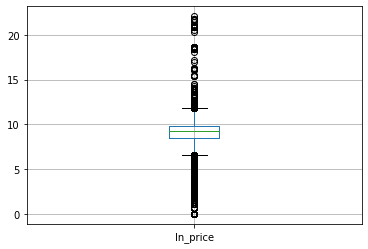

In [0]:
# DO BOX AND WHISKERS PLOT TO REMOVE ALL ABNORMALY [DAN]
df.boxplot(column ="ln_price")

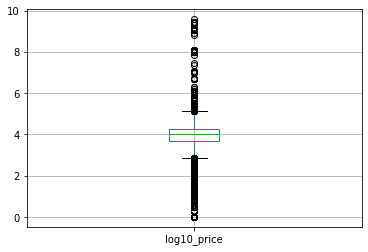

In [0]:
# we can see that both ln and lg of the prices result in similar amount of anomalies
# I will proceed to continue using the log10 price. It makes sense to use base 10 because we are dealing with prices
# we can see that the anomalies are any (log10_price) > 5 and (log10_price) < 3
df.boxplot(column ='log10_price')

In [0]:

# remove the anomalies from the decided values from the above line
df.drop( df[ df['log10_price'] > 5 ].index , inplace=True)
df.drop( df[ df['log10_price'] < 3 ].index , inplace=True)

#df.drop( df[ df['log10_price'] > 5.1 ].index , inplace=True)
#df.drop( df[ df['log10_price'] < 3.1 ].index , inplace=True)

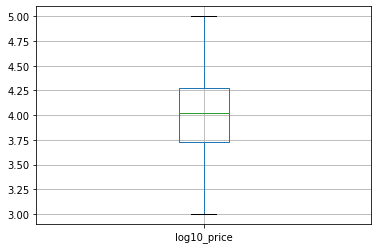

In [0]:
# now data do not have any anomalies
df.boxplot(column ='log10_price')

In [0]:
# CHECK THROUGH NaN DATA WITHIN COLUMNS, REMOVE ROWS THAT HAVE MISSING DATA > 3 COLUMNS
df.head(20)


,year,manufacturer,make,condition,cylinders,fuel,odometer,transmission,type,price,ln_price,log10_price
0,2009.0,chevrolet,suburban lt2,good,8,gas,217743.0,automatic,SUV,9000,9.104980,3.954243
1,2012.0,ram,2500,NaN,NaN,diesel,NaN,automatic,NaN,31999,10.373460,4.505136
2,2003.0,ram,3500,NaN,NaN,diesel,NaN,manual,NaN,16990,9.740380,4.230193
3,2002.0,gmc,sierra 1500,good,8,gas,195000.0,automatic,pickup,6000,8.699515,3.778151
4,2012.0,chevrolet,3500,excellent,8,diesel,178000.0,automatic,pickup,37000,10.518673,4.568202
5,2003.0,NaN,F150,fair,8,gas,269000.0,automatic,pickup,3700,8.216088,3.568202
6,2013.0,ford,f-250,NaN,8,gas,116792.0,automatic,pickup,19950,9.900984,4.299943
7,2006.0,ram,2500,NaN,NaN,diesel,NaN,manual,NaN,19999,9.903438,4.301008
8,2015.0,ford,f-350,NaN,8,diesel,77350.0,automatic,pickup,33950,10.432644,4.530840
9,2015.0,ford,f-350,NaN,8,gas,121030.0,automatic,truck,25950,10.163927,4.414137


In [0]:
# remove all entries with any NaN data

moddf = df.dropna(thresh=12)
moddf.head(20)

,year,manufacturer,make,condition,cylinders,fuel,odometer,transmission,type,price,ln_price,log10_price
0,2009.0,chevrolet,suburban lt2,good,8,gas,217743.0,automatic,SUV,9000,9.104980,3.954243
3,2002.0,gmc,sierra 1500,good,8,gas,195000.0,automatic,pickup,6000,8.699515,3.778151
4,2012.0,chevrolet,3500,excellent,8,diesel,178000.0,automatic,pickup,37000,10.518673,4.568202
12,2010.0,cadillac,srx luxury collection,good,8,gas,140000.0,automatic,SUV,9700,9.179881,3.986772
13,2001.0,chevrolet,silverado 1500,fair,8,gas,220000.0,automatic,pickup,2500,7.824046,3.397940
15,2011.0,cadillac,srx lux,excellent,6,gas,75000.0,automatic,SUV,12950,9.468851,4.112270
16,2011.0,gmc,acadia denali,excellent,6,gas,140000.0,automatic,SUV,11995,9.392245,4.079000
20,2010.0,jeep,wrangler,excellent,6,gas,112779.0,automatic,SUV,18995,9.851931,4.278639
24,2014.0,gmc,sierra 1500,excellent,8,gas,75528.0,automatic,truck,31790,10.366907,4.502291
25,2015.0,ram,3500,excellent,8,gas,131220.0,automatic,truck,20270,9.916897,4.306854


## **Data Visualization** 

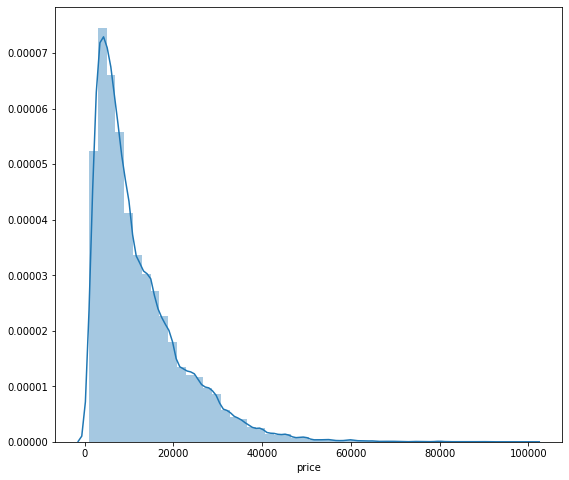

In [0]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(moddf['price'])

Text(0.5, 0, 'Odometer')

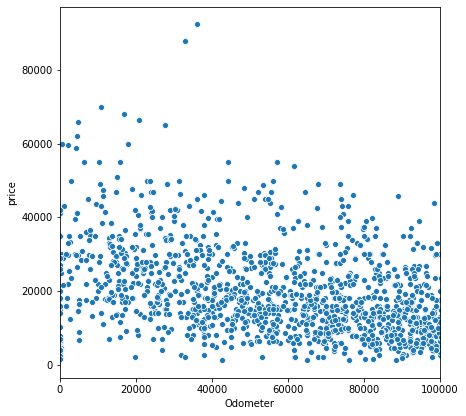

In [0]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
ax1 = fig.add_subplot(2,2,1)
plt.xlim([0, 100000])
p1 = sns.scatterplot(x="odometer", y="price", data=moddf)
loc, labels = plt.xticks()
ax1.set_xlabel('Odometer')


[Text(0, 0, 'chevrolet'),
 Text(0, 0, 'gmc'),
 Text(0, 0, 'cadillac'),
 Text(0, 0, 'jeep'),
 Text(0, 0, 'ram'),
 Text(0, 0, 'nissan'),
 Text(0, 0, 'volkswagen'),
 Text(0, 0, 'hyundai'),
 Text(0, 0, 'ford'),
 Text(0, 0, 'honda'),
 Text(0, 0, 'toyota'),
 Text(0, 0, 'dodge'),
 Text(0, 0, 'bmw'),
 Text(0, 0, 'subaru'),
 Text(0, 0, 'lexus'),
 Text(0, 0, 'mercedes-benz'),
 Text(0, 0, 'rover'),
 Text(0, 0, 'acura'),
 Text(0, 0, 'saturn'),
 Text(0, 0, 'mazda'),
 Text(0, 0, 'mitsubishi'),
 Text(0, 0, 'pontiac'),
 Text(0, 0, 'volvo'),
 Text(0, 0, 'buick'),
 Text(0, 0, 'mercury'),
 Text(0, 0, 'chrysler'),
 Text(0, 0, 'audi'),
 Text(0, 0, 'kia'),
 Text(0, 0, 'jaguar'),
 Text(0, 0, 'mini'),
 Text(0, 0, 'ferrari'),
 Text(0, 0, 'lincoln'),
 Text(0, 0, 'infiniti'),
 Text(0, 0, 'harley-davidson'),
 Text(0, 0, 'datsun'),
 Text(0, 0, 'fiat'),
 Text(0, 0, 'alfa-romeo'),
 Text(0, 0, 'land rover'),
 Text(0, 0, 'hennessey'),
 Text(0, 0, 'porche'),
 Text(0, 0, 'morgan'),
 Text(0, 0, 'aston-martin')]

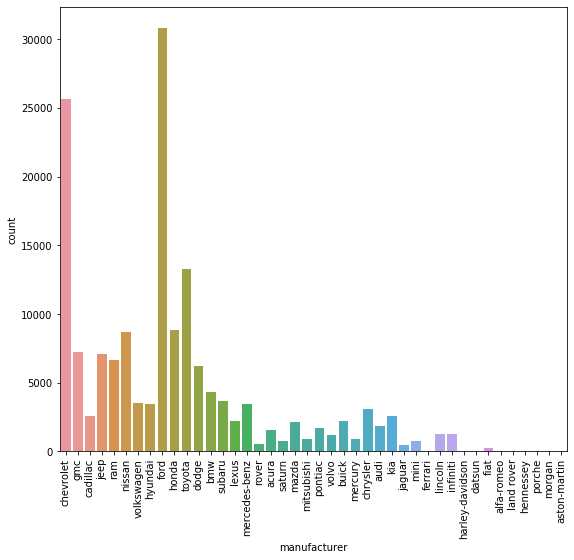

In [0]:
fig = plt.figure(figsize=(20,18))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
fig.add_subplot(2,2,1)
g1 = sns.countplot(x='manufacturer', data=moddf)
loc,labels = plt.xticks()
g1.set_xticklabels(labels,rotation=90)


[Text(0, 0, 'automatic'), Text(0, 0, 'manual'), Text(0, 0, 'other')]

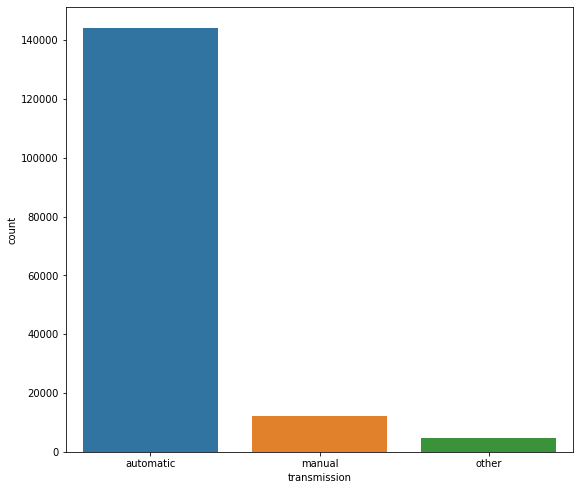

In [0]:
fig = plt.figure(figsize=(20,18))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
fig.add_subplot(2,2,3)
g3 = sns.countplot(x='transmission', data=moddf)
loc,labels = plt.xticks()
g3.set_xticklabels(labels,rotation=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


[Text(0, 0, 'gas'),
 Text(0, 0, 'diesel'),
 Text(0, 0, 'hybrid'),
 Text(0, 0, 'other'),
 Text(0, 0, 'electric')]

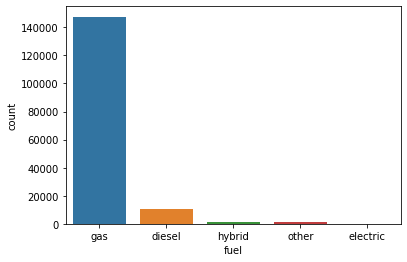

In [0]:
fig.add_subplot(2,2,2)
g2 = sns.countplot(x='fuel', data=moddf)
loc,labels = plt.xticks()
g2.set_xticklabels(labels,rotation=0)

In [0]:

# Price vs Manufacturer
#moddf.plot( x='manufacturer', y='price', kind='bar')
#plot.show()

In [0]:
# Price vs Type
#moddf.plot

In [0]:
# USE SEABORN TO GENERATE COREELATION AND COMPARE RELATIONSHIP TO EACH OTHER, MAYBE REMOVE CERTAIN PARAMETERS IF ITS CONNECTED
# pairplot
#import seaborn as sns
#sns.set(style="ticks", color_codes=True)
#sns.pairplot(daily_ret) # replace daily_ret with a dataframe

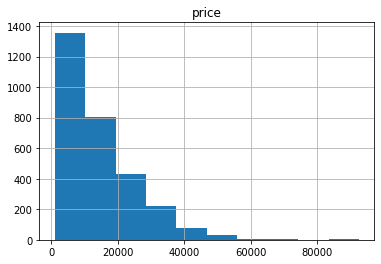

In [0]:
# HISTOGRAM OF PRICES TO PROJECT MOST AVERAGE PRICE

#we normalised the data using log of base 10
hist = moddf.hist(column='price')

Text(4.081419487985394, 1831.2, 'Mean: 4.06111392')

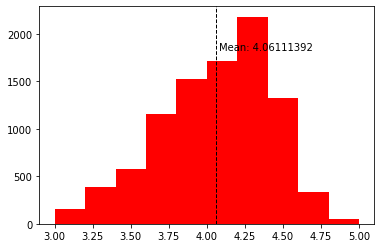

In [0]:
x = df.log10_price
plt.hist(x, color= 'red')
plt.axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(x.mean()*1.005, max_ylim*0.8, 'Mean: {:.8f}'.format(x.mean()), color = 'black')

In [0]:

# mean(log10_price) = 3.99239351
# mean price

mean_price = 10 ** 3.99239351
print('Mean price of used cars: $', round(mean_price,2))

Mean price of used cars: $ 9826.38


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


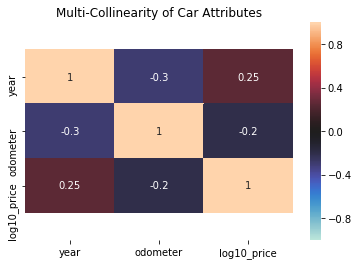

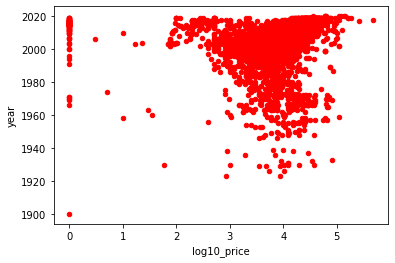

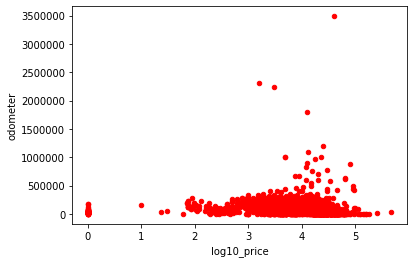

,year,odometer,price,log10_price
year,1.000000,-0.296023,0.235328,0.250018
odometer,-0.296023,1.000000,-0.229949,-0.197119
price,0.235328,-0.229949,1.000000,0.638131
log10_price,0.250018,-0.197119,0.638131,1.000000


In [0]:
# FIND CORRELATION OF EACH PARAMETER TO PRICE [YANBO]
# PLOT A HEAT MAP WITH CORRELATION (REFER TO https://towardsdatascience.com/using-machine-learning-to-predict-home-prices-d5d534e42d38)

#use seaborn 
"""
parameters:
year            float64
manufacturer     object
make             object
condition        object
cylinders        object
fuel             object
odometer        float64
transmission     object
type
"""
import seaborn as sns
import pandas as pd
pd.set_option('display.max_columns', None)
data = pd.read_csv('craigslistVehiclesTiny.csv', low_memory=False, lineterminator ='\n')
# data.head()
df = data[['year', 'manufacturer', 'make', 'condition', 'cylinders', 'fuel', 'odometer', 'transmission', 'type', 'price']].copy(deep = True)
# print(df.head())
# c= (df['cylinders'])
# pd.to_numeric(c)
# print(c)

# print(df.loc['cylinders'])
# df1 = df[['year','price']]
# print(df.head())
# heatmap1 = pd.pivot_table(df1,values='price',columns='year' )
# sns.heatmap(heatmap1,cmap="YlGnBu")

# df1=df[['year','odometer','cylinders','price']]

df['log10_price'] = np.log10(df["price"])
df1=df[['year','odometer','log10_price']]
# df2=df[['year','odometer','price']]
ax1=sns.heatmap(df1.corr(),vmin=-1,vmax=1,center=0,annot=True)

# ax2=sns.heatmap(df2.corr(),vmin=-1,vmax=1,center=0,cmap='Blues',annot=True)
ax1.set_title('Multi-Collinearity of Car Attributes')
bottom,top=ax1.get_ylim()
ax1.set_ylim(bottom+0.5,top-0.5)


df1.plot(kind='scatter',x='log10_price',y='year',color='red')
df1.plot(kind='scatter',x='log10_price',y='odometer',color='red')
plt.show()
df.corr(method='pearson')
# df.style.set_caption('Pearson Coefficient (Big Data Set)')
# pearson : standard correlation coefficient



In [0]:
# SCATTER PLOT OF CORRELATION OF EACH PARAMETER TO PRICE [YANBO]
# REFER TO https://towardsdatascience.com/using-machine-learning-to-predict-home-prices-d5d534e42d38
# pandas.dataframe.corr (check if can use)

In [0]:
moddf.head()

,year,manufacturer,make,condition,cylinders,fuel,odometer,transmission,type,price,ln_price,log10_price
0,2009.0,chevrolet,suburban lt2,good,8,gas,217743.0,automatic,SUV,9000,9.104980,3.954243
3,2002.0,gmc,sierra 1500,good,8,gas,195000.0,automatic,pickup,6000,8.699515,3.778151
4,2012.0,chevrolet,3500,excellent,8,diesel,178000.0,automatic,pickup,37000,10.518673,4.568202
12,2010.0,cadillac,srx luxury collection,good,8,gas,140000.0,automatic,SUV,9700,9.179881,3.986772
13,2001.0,chevrolet,silverado 1500,fair,8,gas,220000.0,automatic,pickup,2500,7.824046,3.397940


In [0]:
#year
a = moddf.year

#manufacturer
b = moddf.manufacturer

#make
c = moddf.make

#condition
d = moddf.condition

#cylinders
e = moddf.cylinders

#fuel
f = moddf.fuel

#odometer
g = moddf.odometer

#transmission
h = moddf.transmission

#type
i = moddf.type

#price
j = moddf.price

In [0]:
# Minimum price of the data
minimum_price = np.amin(j)

# Maximum price of the data
maximum_price = np.amax(j)

# Mean price of the data
mean_price = np.mean(j)

# Median price of the data
median_price = np.median(j)

# Standard deviation of prices of the data
std_price = np.std(j)

# Show the calculated statistics
print("Statistics for Used Cars dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Used Cars dataset:

Minimum price: $1000
Maximum price: $92500
Mean price: $14344.84442169908
Median price $11500.0
Standard deviation of prices: $11121.92032755371


Text(4.039917246308959, 486.36000000000007, 'Mean: 4.01981816')

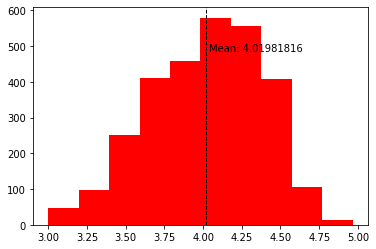

In [0]:

x = moddf.log10_price
plt.hist(x, color= 'red')
plt.axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(x.mean()*1.005, max_ylim*0.8, 'Mean: {:.8f}'.format(x.mean()), color = 'black')

In [0]:
moddf.shape

(2931, 12)

## **Model**

In [0]:
# SPLIT TO TRAIN AND TEST (75/25)
# training set is called train
# test set is called test

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

le = preprocessing.LabelEncoder()
oe = preprocessing.OneHotEncoder()
# split into dependent and independent variables

# remember to rename type
from collections import defaultdict



In [0]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [0]:
#obtain an encoded dataset
MultiColumnLabelEncoder(columns = ['year', 'manufacturer', 'make', 'condition', 'cylinders', 'fuel', 'odometer', 'transmission', 'type']).fit_transform(moddf)

,year,manufacturer,make,condition,cylinders,fuel,odometer,transmission,type,price,ln_price,log10_price
0,53,5,1133,2,6,2,1916,0,0,9000,9.104980,3.954243
3,46,12,1025,2,6,2,1843,0,8,6000,8.699515,3.778151
4,56,5,82,0,6,0,1743,0,8,37000,10.518673,4.568202
12,54,4,1121,2,6,2,1480,0,0,9700,9.179881,3.986772
13,45,5,1051,1,6,2,1921,0,8,2500,7.824046,3.397940
...,...,...,...,...,...,...,...,...,...,...,...,...
10570,57,34,735,1,3,2,1290,0,9,4250,8.354674,3.628389
10573,60,23,665,2,3,2,765,0,0,23999,10.085767,4.380193
10574,49,5,1051,0,6,2,859,0,10,10900,9.296518,4.037426
10582,61,5,346,2,3,2,1314,0,9,9999,9.210240,3.999957


In [0]:
X = moddf[['year', 'manufacturer', 'make', 'condition', 'cylinders', 'fuel', 'odometer', 'transmission', 'type']]
y = moddf['price']

modX = MultiColumnLabelEncoder(columns = ['year', 'manufacturer', 'make', 'condition', 'cylinders', 'fuel', 'odometer', 'transmission', 'type']).fit_transform(X)



In [0]:
X_train, X_test, y_train, y_test = train_test_split(modX, y, test_size=0.25,random_state = 5)

In [0]:
# REGRESSION (Yan Bo)
#base on the scatter plot the relationship is not obvious hence linear regression model may not work very well in this case.
#try SVM instead
#binary relevance?
#10-fold validation #sklearn ensemble methods

In [0]:
# DecisionTree Regressor (Chels)
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

clf=DecisionTreeRegressor(random_state=0, max_features='sqrt')
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
accuracy=metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.1377899045020464


[0.6766687320146054, 0.6719725256154966, 0.6694548087512571, 0.6761959764430859, 0.6775852900947221, 0.682275202715203, 0.6623021348409674, 0.674947706150312, 0.6885601485082262, 0.6685564119850433, 0.6757884322652683, 0.6830847992234542, 0.6669857295841612, 0.6684491374796527, 0.6743060861395329, 0.6689663029243309, 0.6707551244399372, 0.6834362772378748, 0.6739338345136376]


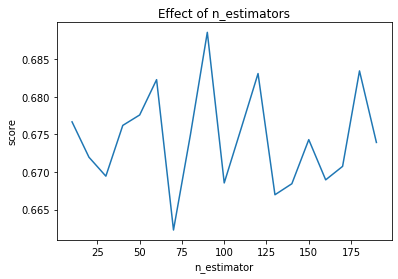

In [0]:
#Decision Tree Regressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = DecisionTreeRegressor()

estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)
print(scores)

In [0]:
# DecisionTree Classifier (Chels)
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

clf=DecisionTreeClassifier(random_state=0, max_features='sqrt')
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
accuracy=metrics.accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)



Accuracy: 0.08858603066439523


[0.09369676320272573, 0.08858603066439523, 0.08858603066439523, 0.0919931856899489, 0.0868824531516184, 0.08517887563884156, 0.08517887563884156, 0.0919931856899489, 0.09028960817717206, 0.09028960817717206, 0.0868824531516184, 0.0868824531516184, 0.0919931856899489, 0.0868824531516184, 0.0868824531516184, 0.0868824531516184, 0.09028960817717206, 0.08517887563884156, 0.09028960817717206]


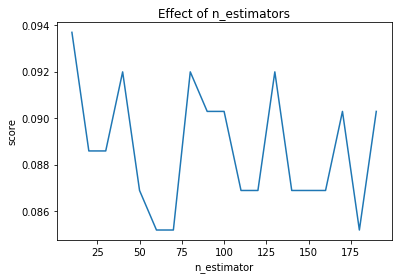

In [0]:
#Decision Tree Classifier
from sklearn.Classifier import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = DecisionTreeClassifier()

estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)
print(scores)

In [0]:
# RandomForest (Dan)

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=50, random_state=0, max_features = 'sqrt', n_jobs=4, verbose =1)

# train the model using the training sets y_pred = clif.predict(X_test)
#clf.fit(X_train, y_train)
clf.fit(X_train, y_train)

# prediction on test set
y_pred = clf.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


Accuracy: 0.13233287858117326


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.1s finished


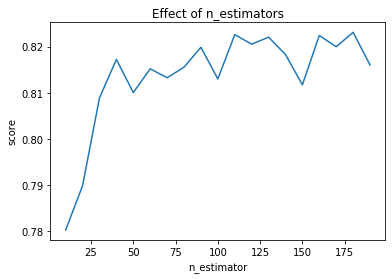

In [0]:
#Random Forest Regressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor 

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestRegressor(n_jobs=-1)

estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [0]:
scores

In [0]:
# SVM

from sklearn import svm
clf=svm.SVR(kernel='poly')
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

NameError: ignored

In [0]:
import os 
import random
import numpy as np  # lineer cebir
import pandas as pd  # veri işeme / input output dosya işlemleri
import matplotlib.pyplot as plt
from IPython.display import display


from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = \
train_test_split(modX, y, test_size = 0.2, random_state = 0)

X_train=np.array(X_train) #listeler numpy dizilerine dönüştürülür. Sequential için
y_train=np.array(y_train)

X_test=np.array(X_test)
y_test=np.array(y_test)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import ModelCheckpoint, Callback
from keras import metrics

loss_function='mean_absolute_error' 
#kayıp fonksiyonu mean absolute error olarak seçilir.

price_predictor = Sequential()  
#sequential modeli, compile-fit-evaluate-predict methodlarını kullanmak için oluşturuluyor
#relu aktivasyonu ile nöron ağı katmanları oluşturuluyor
price_predictor.add(Dense(128,activation='relu', input_dim=9))  
price_predictor.add(Dense(64))
price_predictor.add(Dense(32,activation='relu'))
price_predictor.add(Dense(8))
price_predictor.add(Dense(1))
price_predictor.summary()

price_predictor.compile(optimizer='Adam', loss=loss_function, metrics=['acc'])
checkpointer = ModelCheckpoint(filepath='price_model_best.hdf5', 
                               verbose=1, save_best_only=True)
price_predictor.fit(X_train, y_train, 
          epochs=20, batch_size=500, callbacks=[checkpointer],verbose=0 ) 
#fit, modeli verilen epoch sayısına göre eğitir.

price_predictor.load_weights('price_model_best.hdf5')
score=price_predictor.evaluate(X_test,y_test,verbose=1) 
display("The latest model scores {} for test data.".format(score))




Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 128)               1280      
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_19 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 9         
Total params: 11,889
Trainable params: 11,889
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:707: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


587/587 [==============================] - 0s 265us/step


'The latest model scores [9184.13319014853, 0.0] for test data.'

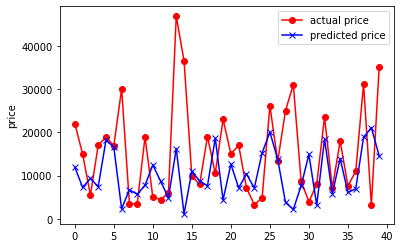

In [0]:
import random

num_samples=40
idx=random.sample(range(len(y_test)),num_samples) 
plt.plot(range(num_samples),y_test[idx],'ro-')
plt.plot(range(num_samples),price_prediction[idx],'bx-')
plt.ylabel("price")
plt.legend(["actual price",'predicted price','mean price'])

In [0]:

from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
price_predictor.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

# fit the model
history = price_predictor.fit(X_train, y_train, validation_split=0.3, epochs=10, verbose=0)

# evaluate the model
loss, accuracy, f1_score, precision, recall = price_predictor.evaluate(X_test, y_test, verbose=0)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
price_predictor.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [0]:
score_Keras = price_predictor.evaluate(X_test, y_test, batch_size=200)
print('accuracy on validatoin data:'+str(score_Keras))

587/587 [==============================] - 0s 217us/step
accuracy on validatoin data:[-235412.61970293868, 0.0]
